In [1]:
!pip install -r requirements.txt --user

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import time

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import interpolation as inter

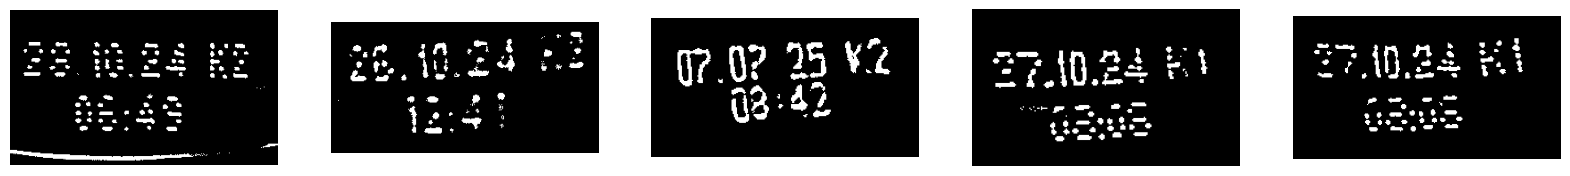

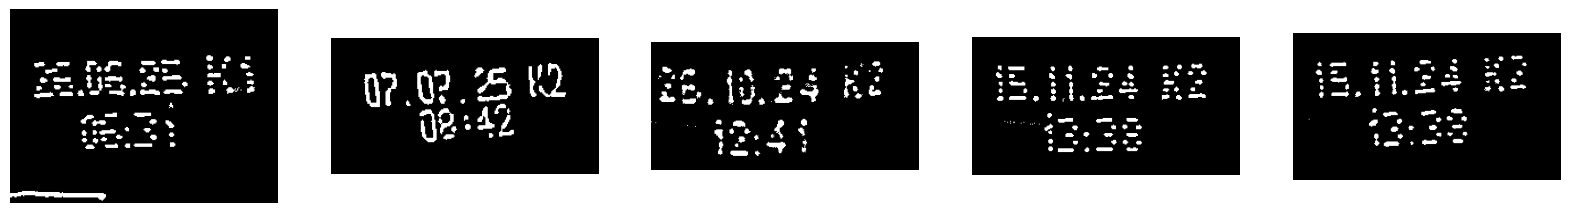

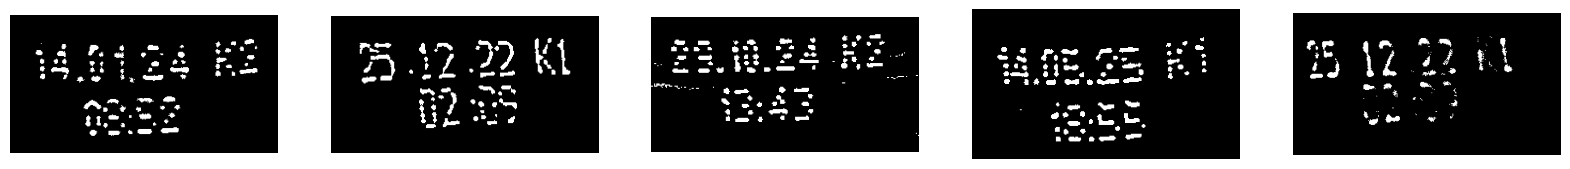

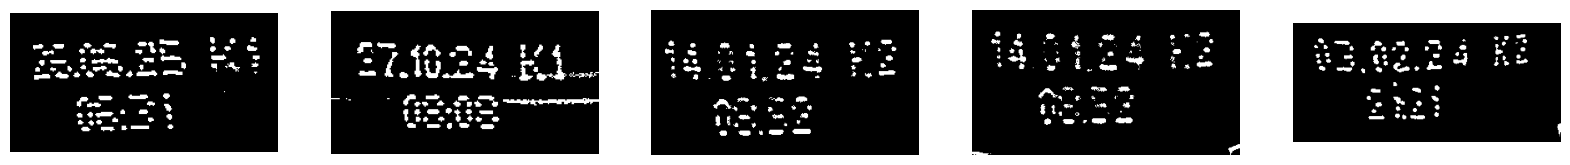

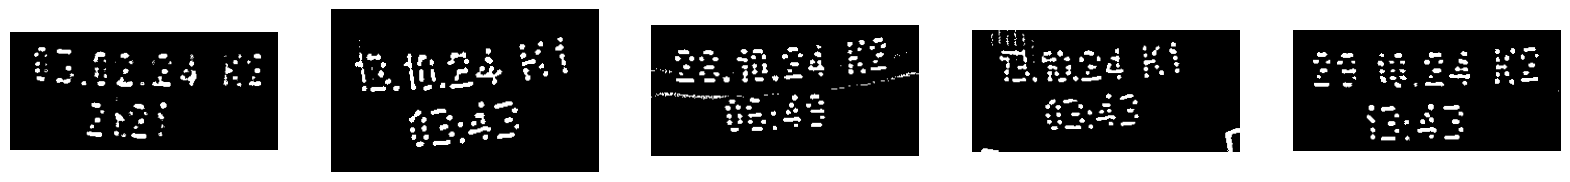

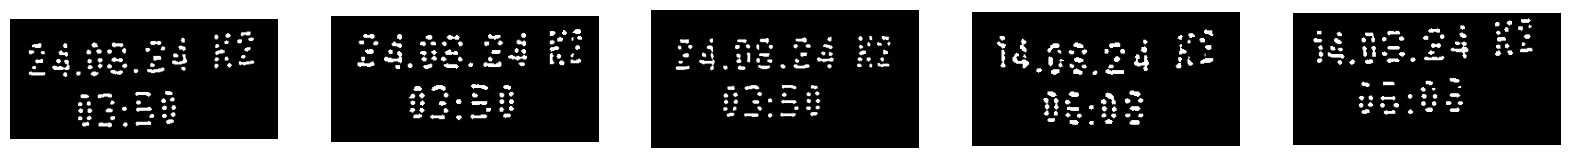

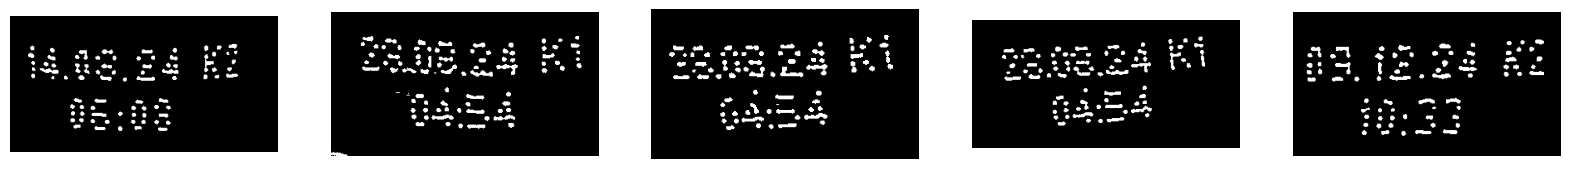

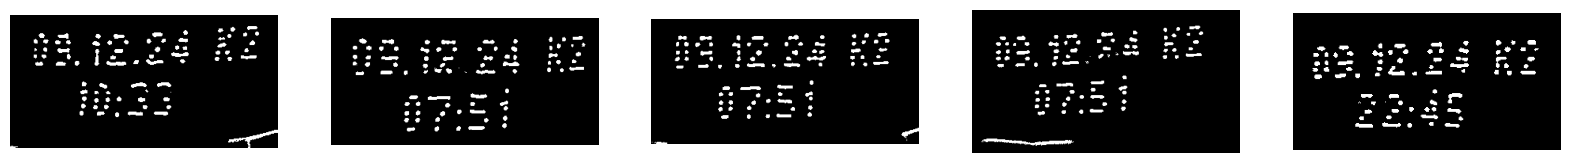

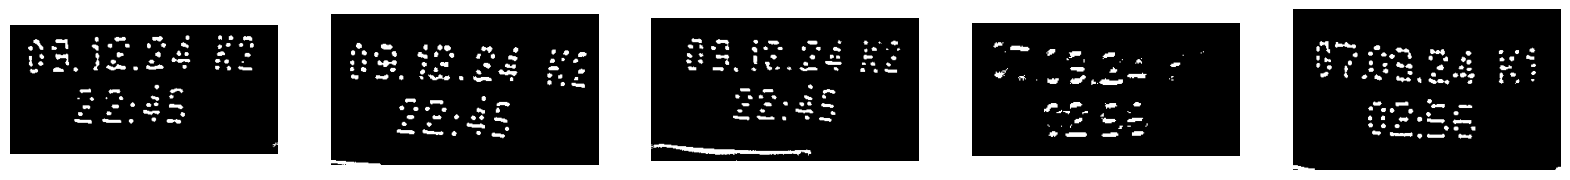

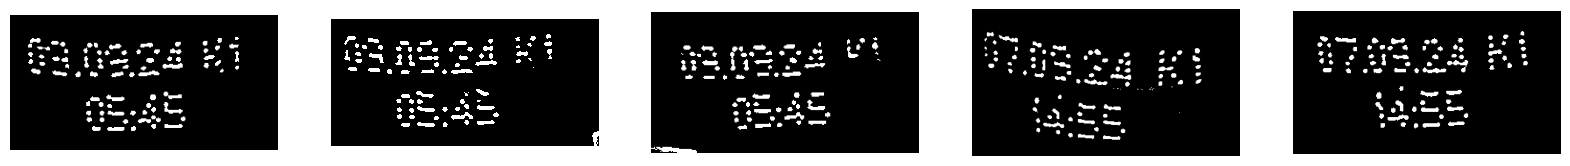

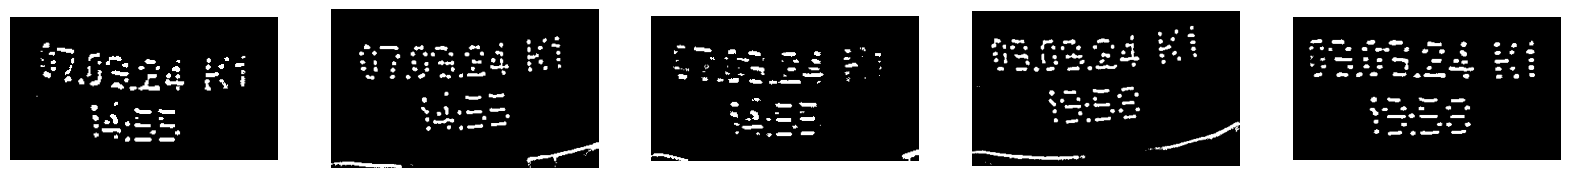

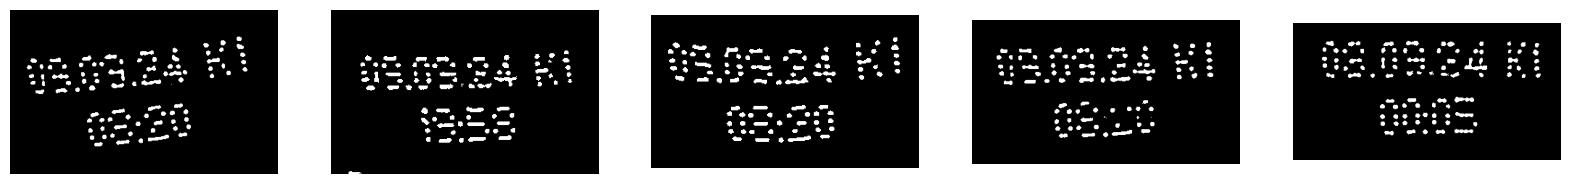

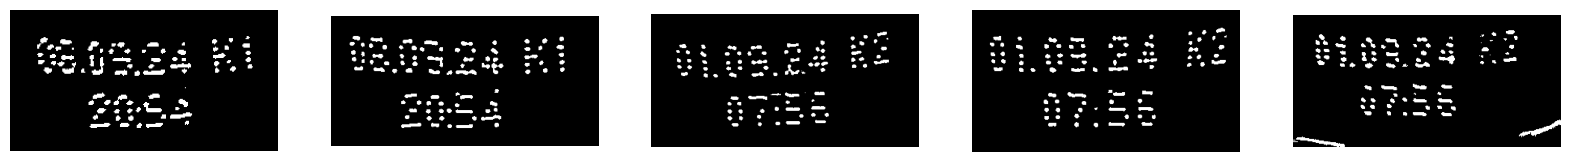

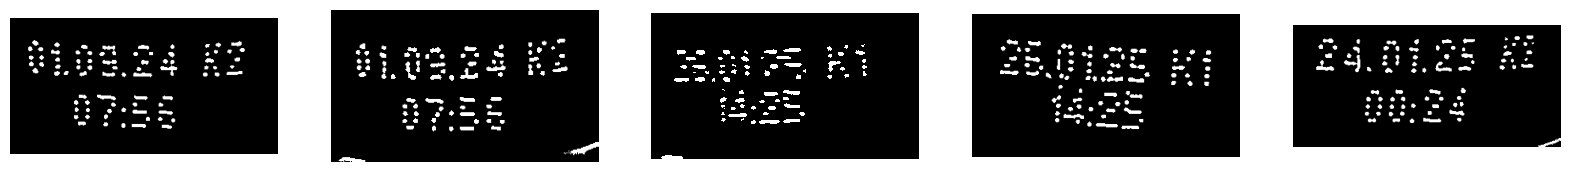

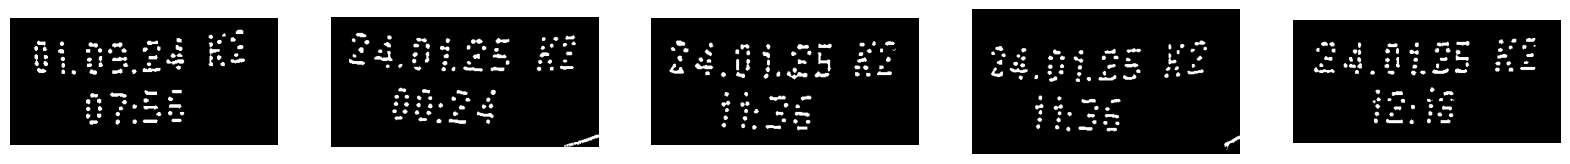

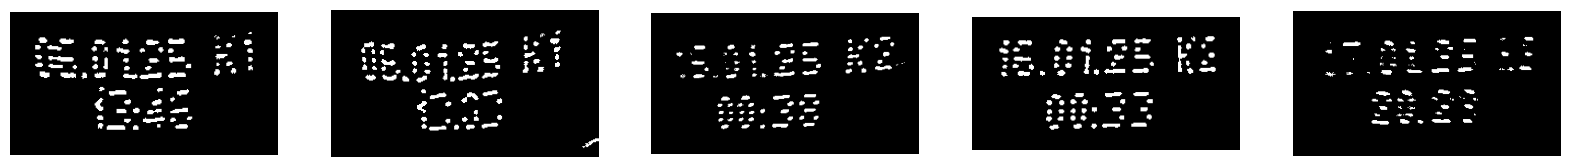

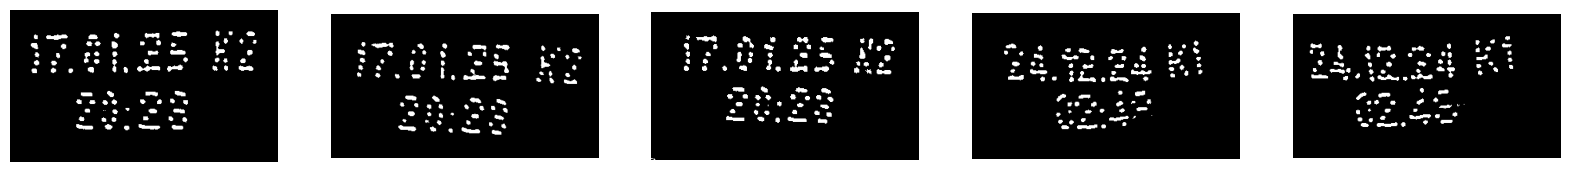

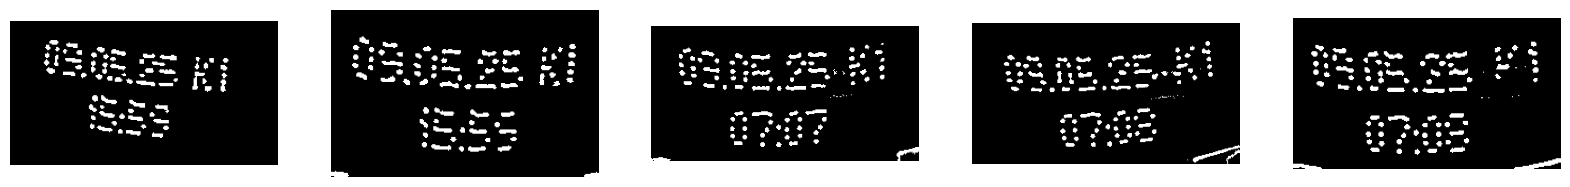

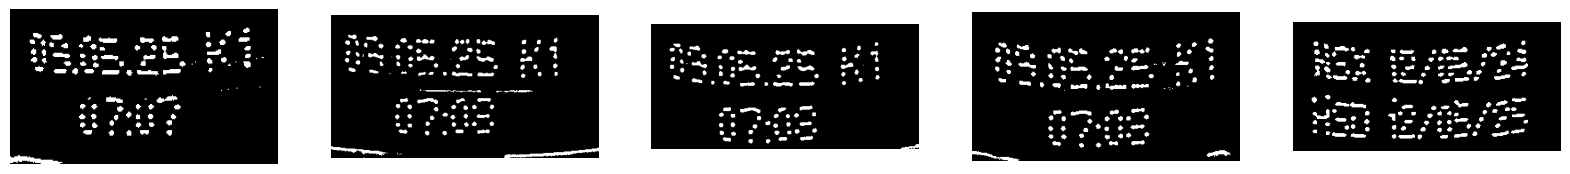

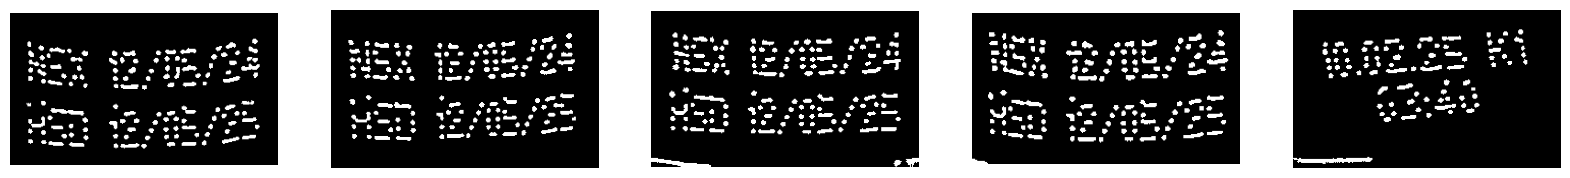

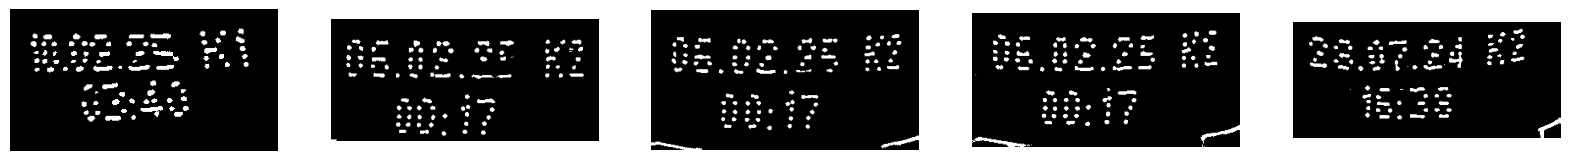

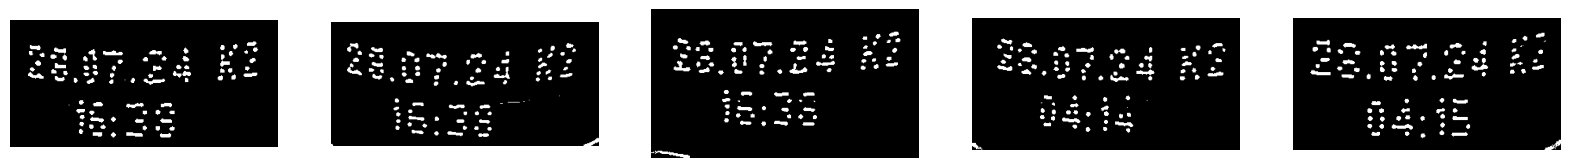

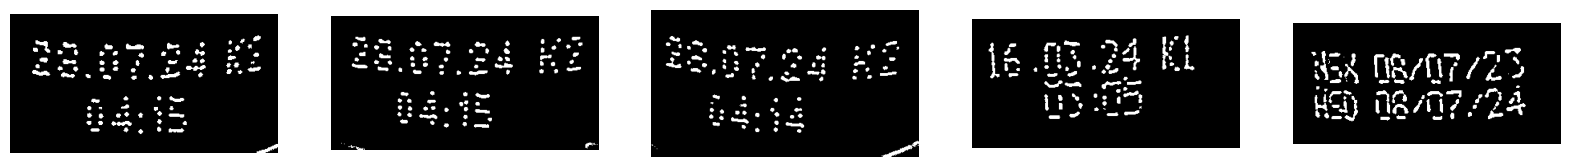

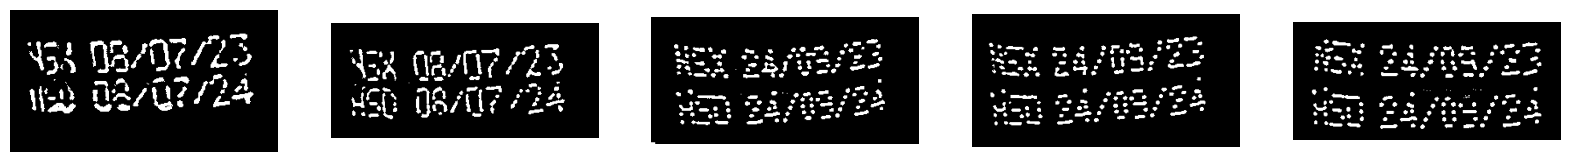

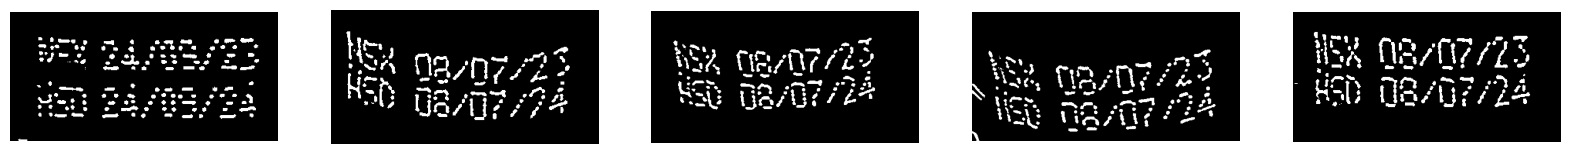

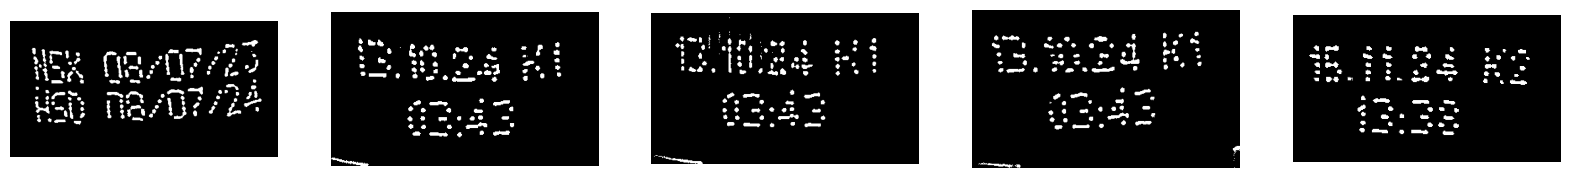

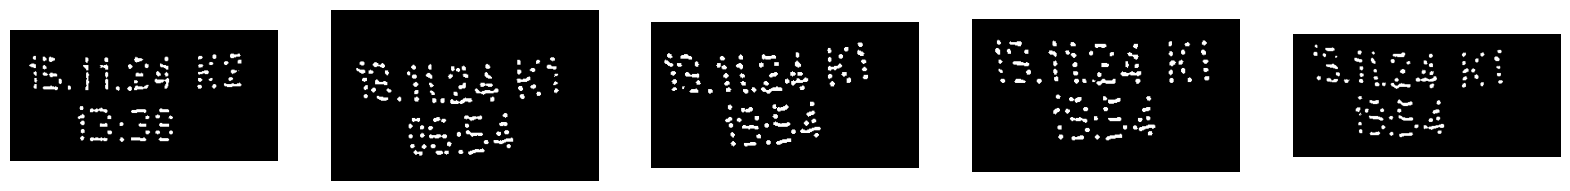

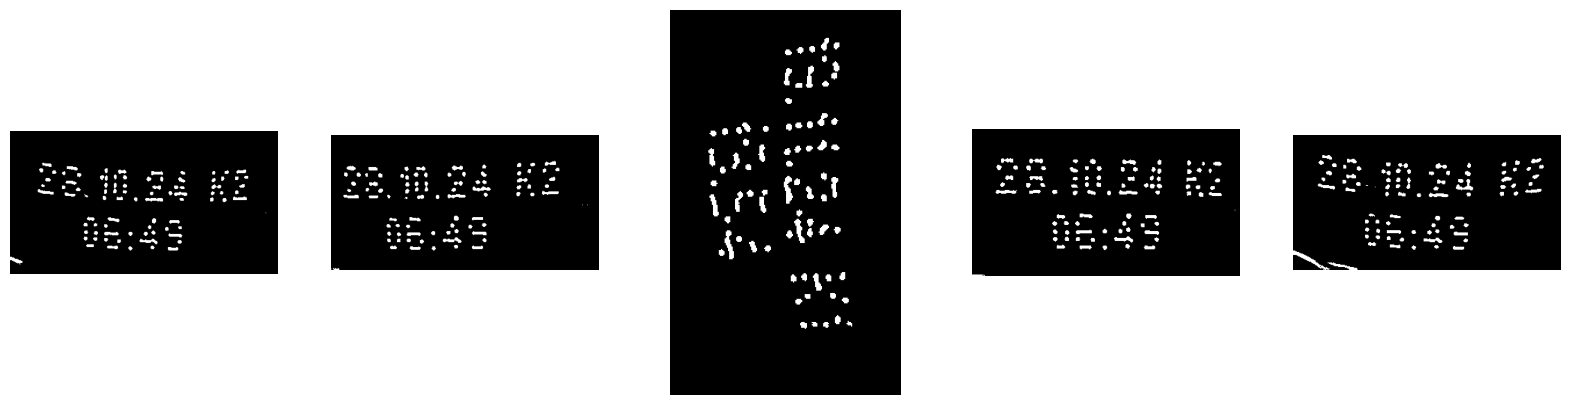

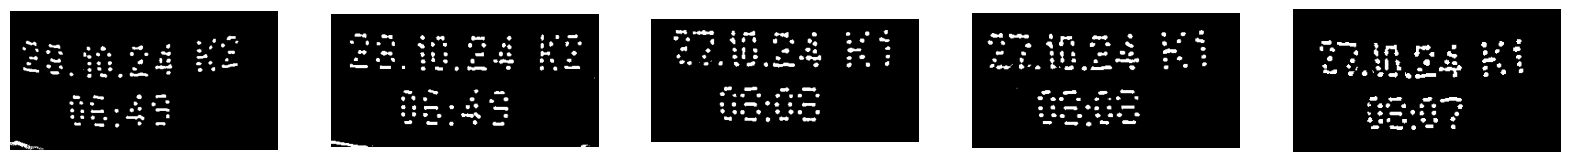

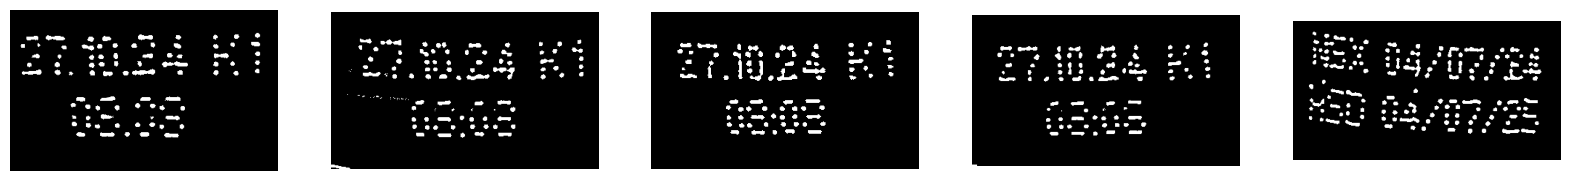

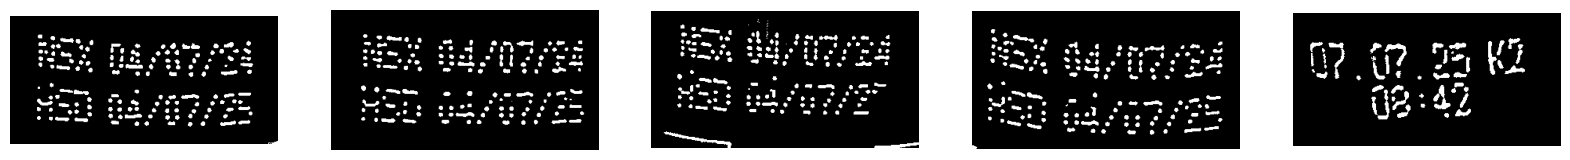

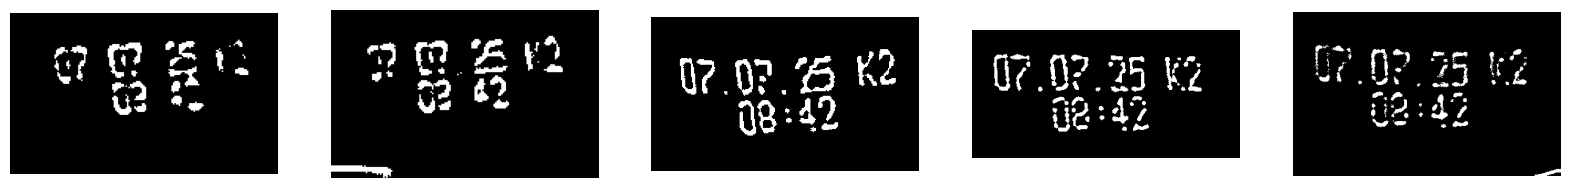

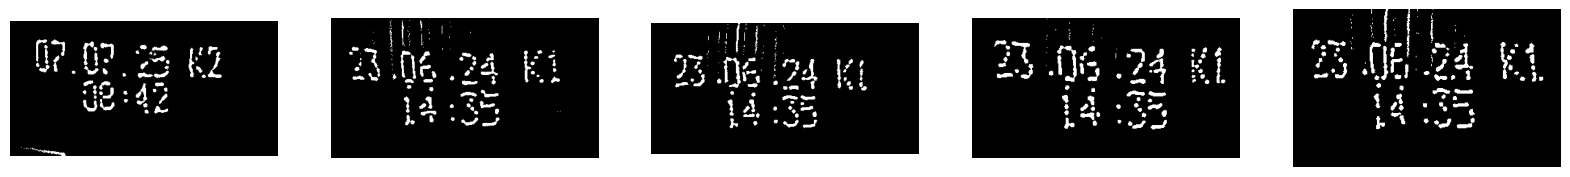

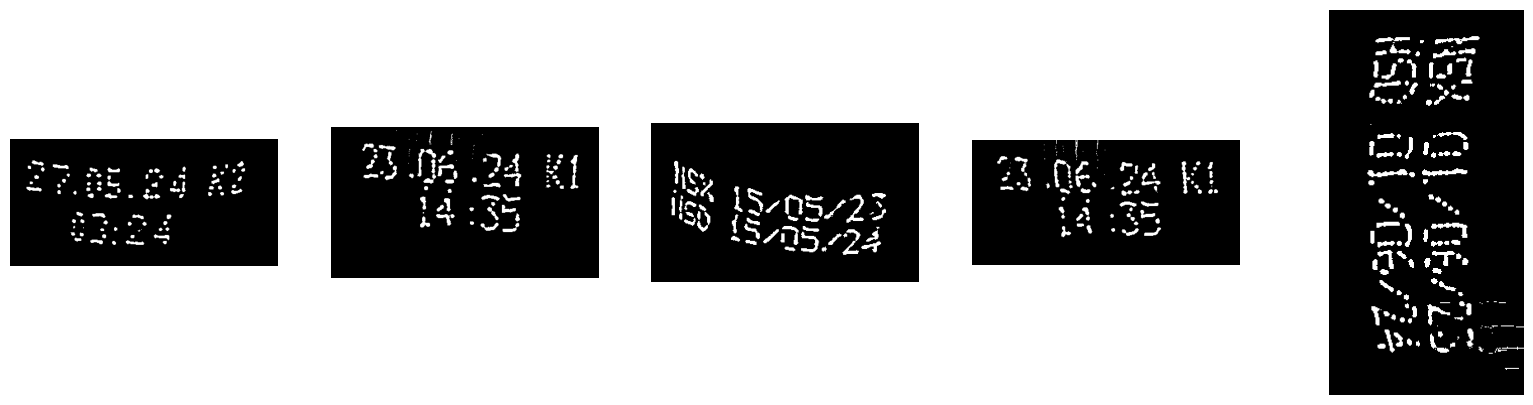

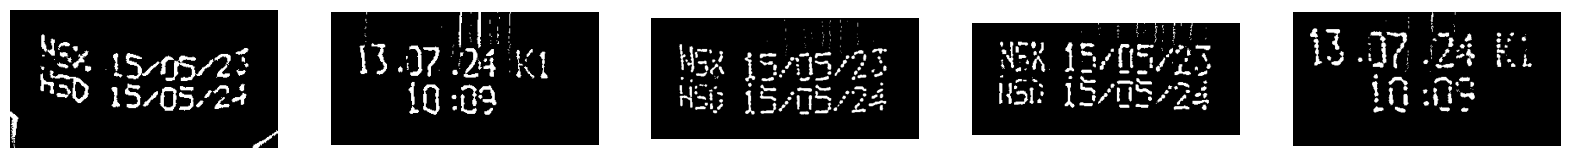

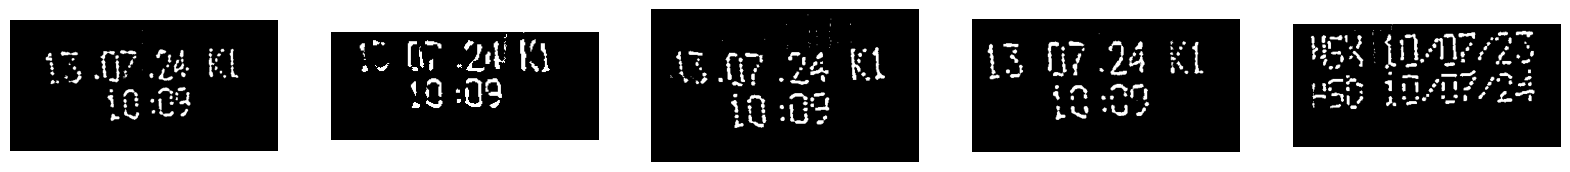

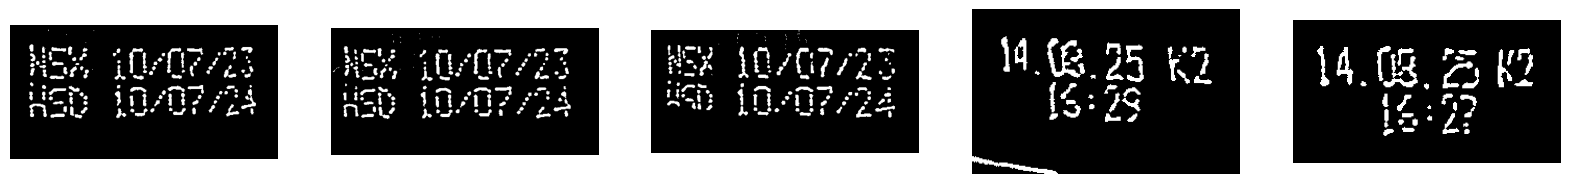

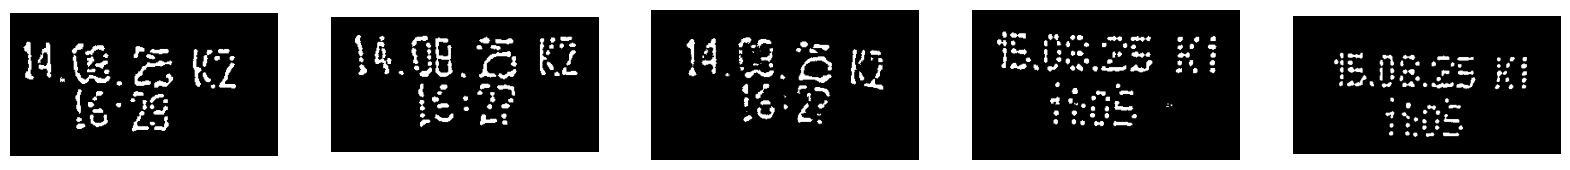

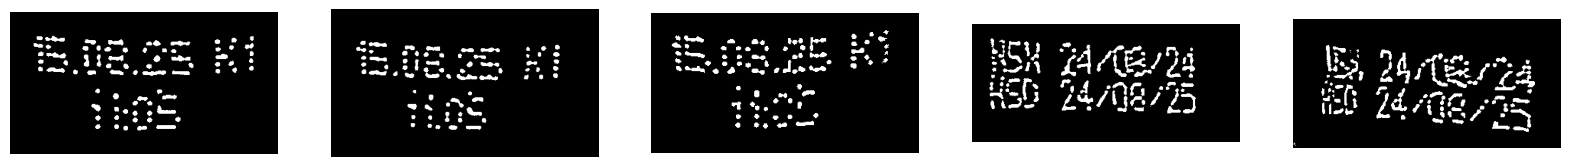

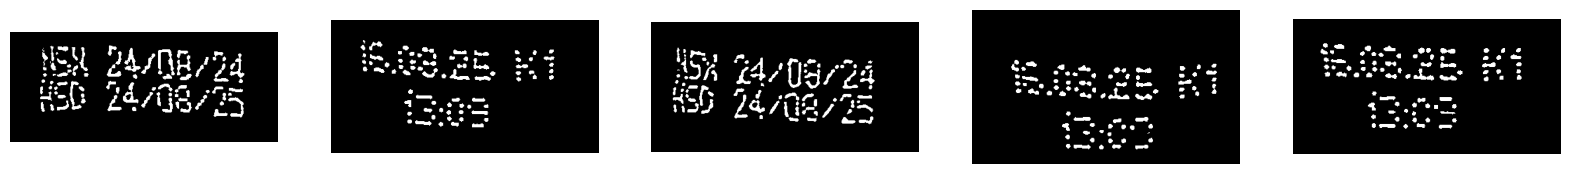

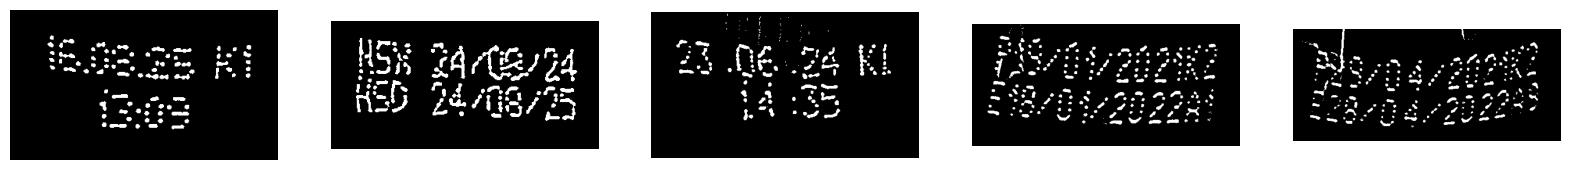

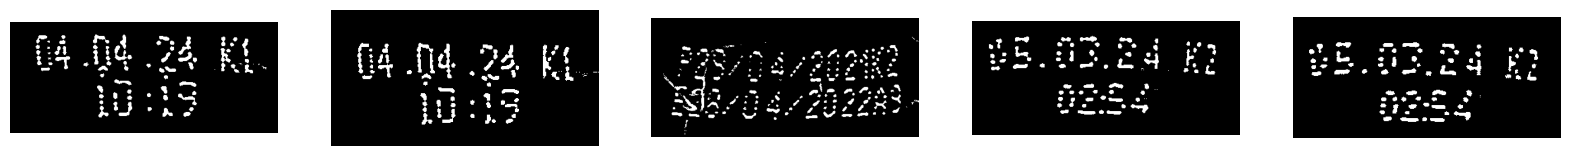

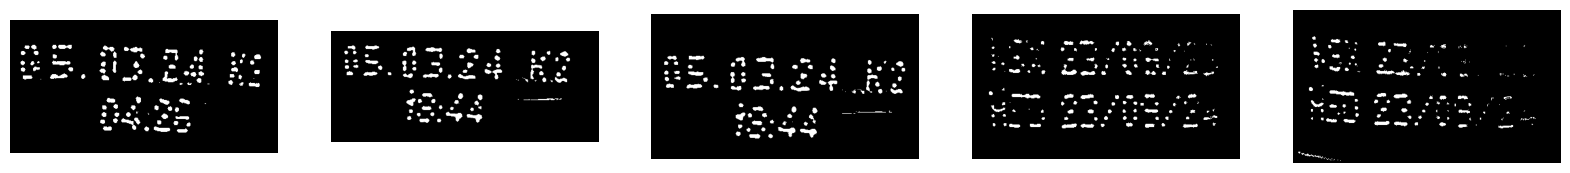

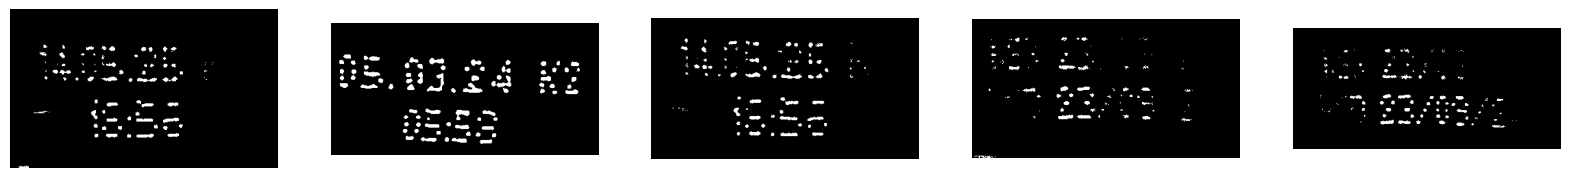

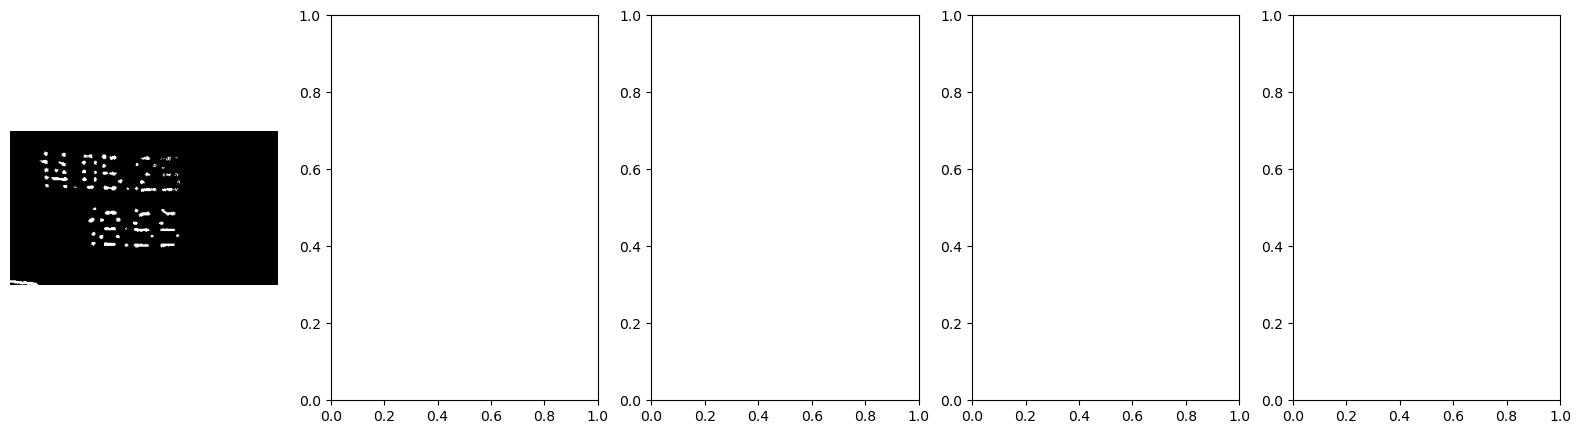

In [3]:


def fill_black_corners(image, threshold=5):
    # Create a mask where all channels are exactly zero
    mask = np.all(image <= threshold, axis=-1)
    
    # Use inpainting to fill in the black areas
    inpainted_image = cv2.inpaint(image, mask.astype(np.uint8), 3, cv2.INPAINT_TELEA)
    
    return inpainted_image

def enhance_text(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    kernel_size = 3
    max_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

    alpha = .8   # Contrast control (1.0-3.0)
    beta = 0     # Brightness control (0-100)

    bilateral_filtered_image = cv2.bilateralFilter(gray_image, 5, 175, 175)
    more_denoised = cv2.fastNlMeansDenoising(bilateral_filtered_image, None, 13, 7, 21)

    contrast = cv2.convertScaleAbs(more_denoised, alpha=alpha, beta=beta)

    # Apply adaptive thresholding for better text visibility
    thresh = cv2.adaptiveThreshold(contrast, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 11, 2)
    return thresh


def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert to RGB
    filled_image = fill_black_corners(image)

    # Enhance text for better extraction
    text_image = enhance_text(filled_image)

    # Display the results
    return text_image


# Path to the folder containing images
photos_path = "./data/more_cap_cropped"

# List all files in the directory

# Process each photo if it ends with .png
count = 0
show_per_row = 5
photo_files = [f for f in os.listdir(photos_path) if os.path.isfile(os.path.join(photos_path, f))]
preprocessed_images = []
for photo_file in photo_files:
    if photo_file.endswith(".png"):
        photo_path = os.path.join(photos_path, photo_file)
        res = process_image(photo_path)
        preprocessed_images.append(res)
        if count % show_per_row == 0:
            fig, axs = plt.subplots(1, show_per_row, figsize=(20, 5))
        axs[count % show_per_row].imshow(res, cmap='gray')
        axs[count % show_per_row].axis('off')
        count += 1
        if count % show_per_row == 0:
            plt.show()

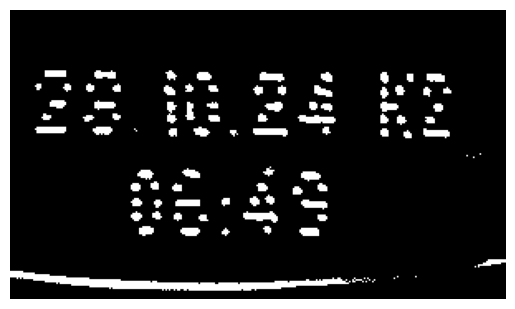

In [9]:
example_image = preprocessed_images[0]
plt.imshow(example_image, cmap='gray')
plt.axis('off')
plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


TEXT:  28
TEXT:  024
TEXT:  Kz
TEXT:  K2


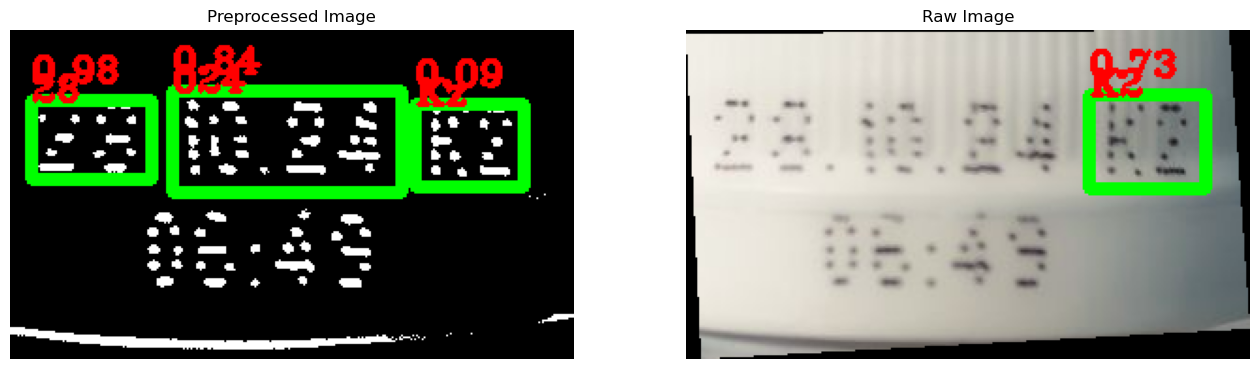

In [20]:
import easyocr

reader = easyocr.Reader(['en'])

# show me the picture with the bounding box and the result of the 
raw_image = cv2.imread(photo_path, cv2.COLOR_BGR2RGB)
preproccessed = cv2.cvtColor(preprocessed_images[0], cv2.COLOR_BGR2RGB)

def draw_bounding_boxes(image,detections,threshold=0.25):
    for bbox,text,score in detections:
        print("TEXT: ",text)
        if score > threshold:
            cv2.rectangle(image, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 255, 0), 5)
            cv2.putText(image, text, tuple(map(int, bbox[0])), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 2)
            cv2.putText(image, str(round(score,2)), (int(bbox[0][0]),int(bbox[0][1]-10)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 2)

preprocessed_detection = reader.readtext(preproccessed,width_ths=0.1)
draw_bounding_boxes(preproccessed, preprocessed_detection,0)

raw_detection = reader.readtext(raw_image)
draw_bounding_boxes(raw_image, raw_detection,0)

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(preproccessed)
plt.axis('off')
plt.title("Preprocessed Image")
plt.subplot(1,2,2)
plt.imshow(raw_image)
plt.axis('off')
plt.title("Raw Image")
plt.show()



TEXT:  28024
--------------------------------------------------
PHOTO  1
WITH PREPROCESSING
['28024']
WITHOUT PREPROCESSING
['K2']
TEXT:  26.11.24:
--------------------------------------------------
PHOTO  3
WITH PREPROCESSING
['26.11.24:']
WITHOUT PREPROCESSING
['10?4', '4']
TEXT:  0? .
TEXT:  83.35
TEXT:  Kz
--------------------------------------------------
PHOTO  5
WITH PREPROCESSING
['0? .', '83.35', 'Kz']
WITHOUT PREPROCESSING
['07.07.25 K2', '08.42']
TEXT:  27.10.246
--------------------------------------------------
PHOTO  7
WITH PREPROCESSING
['27.10.246']
WITHOUT PREPROCESSING
[]
TEXT:  17,4K1
--------------------------------------------------
PHOTO  9
WITH PREPROCESSING
['17,4K1']
WITHOUT PREPROCESSING
[]


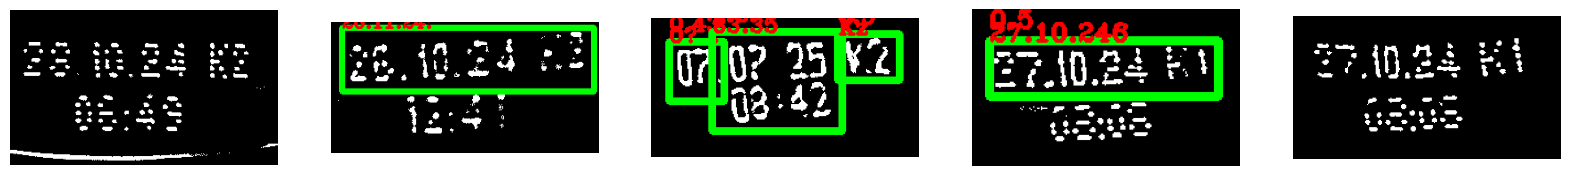

TEXT:  2666.25
--------------------------------------------------
PHOTO  11
WITH PREPROCESSING
['2666.25']
WITHOUT PREPROCESSING
['260625K']
TEXT:  07
TEXT:  '5 K2
TEXT:  03 :
TEXT:  42
--------------------------------------------------
PHOTO  13
WITH PREPROCESSING
['07', "'5 K2", '03 :', '42']
WITHOUT PREPROCESSING
['07.07.5 K2', '08', '#']
TEXT:  2.10.24K2
TEXT:  i2:4
--------------------------------------------------
PHOTO  15
WITH PREPROCESSING
['2.10.24K2', 'i2:4']
WITHOUT PREPROCESSING
['26,1024', '1241']
TEXT:  1.1124
TEXT:  K2
--------------------------------------------------
PHOTO  17
WITH PREPROCESSING
['1.1124', 'K2']
WITHOUT PREPROCESSING
[]
TEXT:  K1.24K2
--------------------------------------------------
PHOTO  19
WITH PREPROCESSING
['K1.24K2']
WITHOUT PREPROCESSING
['5.024K']


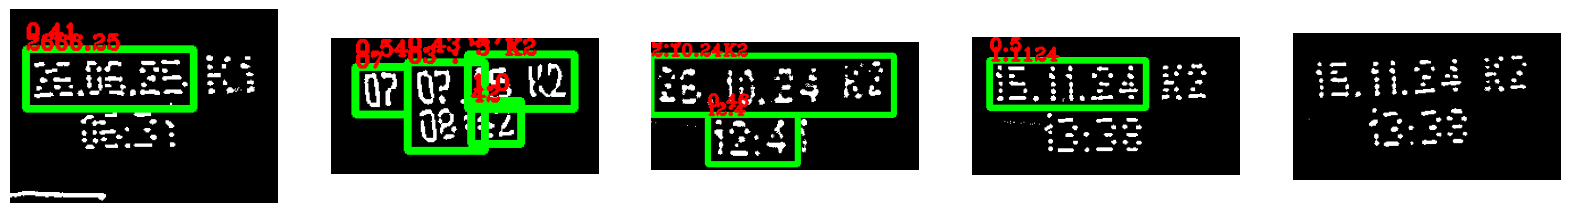

TEXT:  144124K
--------------------------------------------------
PHOTO  21
WITH PREPROCESSING
['144124K']
WITHOUT PREPROCESSING
['43124']
TEXT:  342 2 Kl
TEXT:  02
--------------------------------------------------
PHOTO  23
WITH PREPROCESSING
['342 2 Kl', '02']
WITHOUT PREPROCESSING
['42 .22']
TEXT:  21m24K2
TEXT:  43
--------------------------------------------------
PHOTO  24
WITH PREPROCESSING
['21m24K2', '43']
WITHOUT PREPROCESSING
['29m2', '1343']
TEXT:  4m5z5 K
--------------------------------------------------
PHOTO  25
WITH PREPROCESSING
['4m5z5 K']
WITHOUT PREPROCESSING
['14052', '883']
TEXT:  25 !2 ? N[
--------------------------------------------------
PHOTO  26
WITH PREPROCESSING
['25 !2 ? N[']
WITHOUT PREPROCESSING
['3.42 2 Ki', '07']


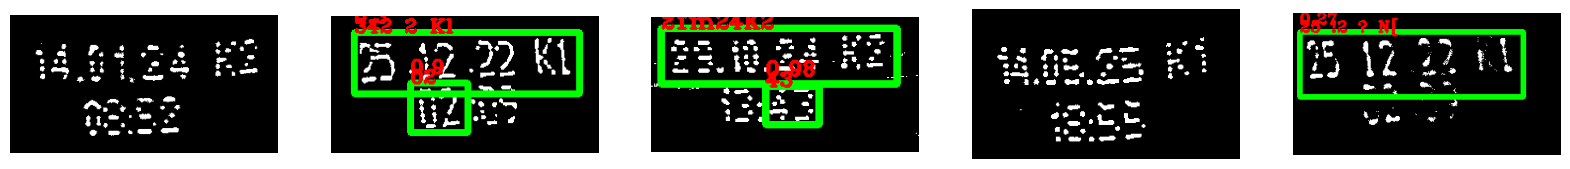

TEXT:  206425
--------------------------------------------------
PHOTO  27
WITH PREPROCESSING
['206425']
WITHOUT PREPROCESSING
[]
TEXT:  {7.124Ki
--------------------------------------------------
PHOTO  28
WITH PREPROCESSING
['{7.124Ki']
WITHOUT PREPROCESSING
['27.024K']
TEXT:  10M124K
--------------------------------------------------
PHOTO  29
WITH PREPROCESSING
['10M124K']
WITHOUT PREPROCESSING
['4']
TEXT:  1401341
--------------------------------------------------
PHOTO  30
WITH PREPROCESSING
['1401341']
WITHOUT PREPROCESSING
['j4,0124', '2', '03']
TEXT:  0302.24 KZ
--------------------------------------------------
PHOTO  31
WITH PREPROCESSING
['0302.24 KZ']
WITHOUT PREPROCESSING
['02.24', '{']


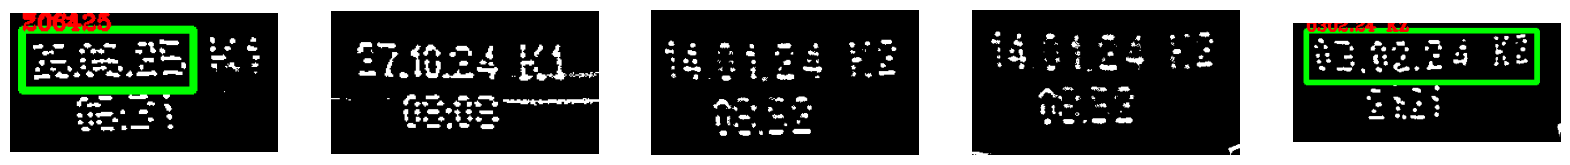

TEXT:  0j0214
--------------------------------------------------
PHOTO  32
WITH PREPROCESSING
['0j0214']
WITHOUT PREPROCESSING
['30214']
TEXT:  02.0024
TEXT:  03
TEXT:  Xi
--------------------------------------------------
PHOTO  33
WITH PREPROCESSING
['02.0024', '03', 'Xi']
WITHOUT PREPROCESSING
['0624']
TEXT:  00241
--------------------------------------------------
PHOTO  34
WITH PREPROCESSING
['00241']
WITHOUT PREPROCESSING
[]
TEXT:  1024K
TEXT:  3-
--------------------------------------------------
PHOTO  35
WITH PREPROCESSING
['1024K', '3-']
WITHOUT PREPROCESSING
['B024M']
TEXT:  29024K2
--------------------------------------------------
PHOTO  36
WITH PREPROCESSING
['29024K2']
WITHOUT PREPROCESSING
['2']


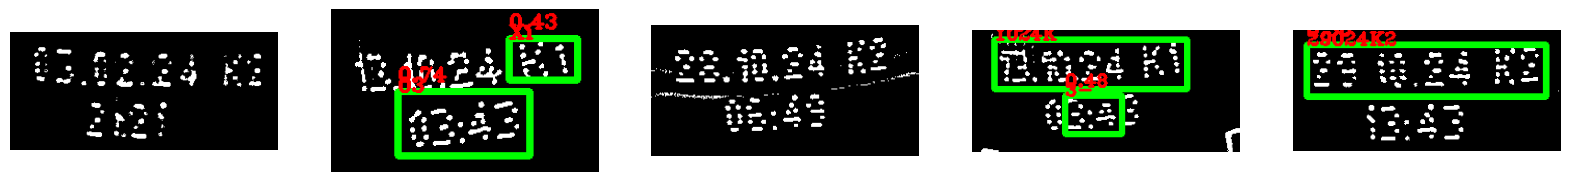

TEXT:  24.08.24
--------------------------------------------------
PHOTO  37
WITH PREPROCESSING
['24.08.24']
WITHOUT PREPROCESSING
['2']
TEXT:  24.08.24
TEXT:  03.5
--------------------------------------------------
PHOTO  38
WITH PREPROCESSING
['24.08.24', '03.5']
WITHOUT PREPROCESSING
[]
TEXT:  24.08.24
--------------------------------------------------
PHOTO  39
WITH PREPROCESSING
['24.08.24']
WITHOUT PREPROCESSING
['08', 'K']
TEXT:  14.68.24 K
--------------------------------------------------
PHOTO  40
WITH PREPROCESSING
['14.68.24 K']
WITHOUT PREPROCESSING
[]
TEXT:  14.08.24
--------------------------------------------------
PHOTO  41
WITH PREPROCESSING
['14.08.24']
WITHOUT PREPROCESSING
[]


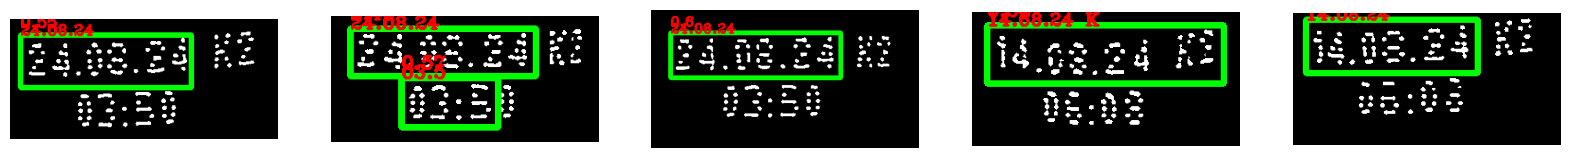

TEXT:  08241
--------------------------------------------------
PHOTO  42
WITH PREPROCESSING
['08241']
WITHOUT PREPROCESSING
['24K']
TEXT:  218_
--------------------------------------------------
PHOTO  43
WITH PREPROCESSING
['218_']
WITHOUT PREPROCESSING
[]
TEXT:  024Ki
TEXT:  634
--------------------------------------------------
PHOTO  44
WITH PREPROCESSING
['024Ki', '634']
WITHOUT PREPROCESSING
[]
TEXT:  8
TEXT:  K
--------------------------------------------------
PHOTO  45
WITH PREPROCESSING
['8', 'K']
WITHOUT PREPROCESSING
[]
TEXT:  031224
--------------------------------------------------
PHOTO  46
WITH PREPROCESSING
['031224']
WITHOUT PREPROCESSING
[]


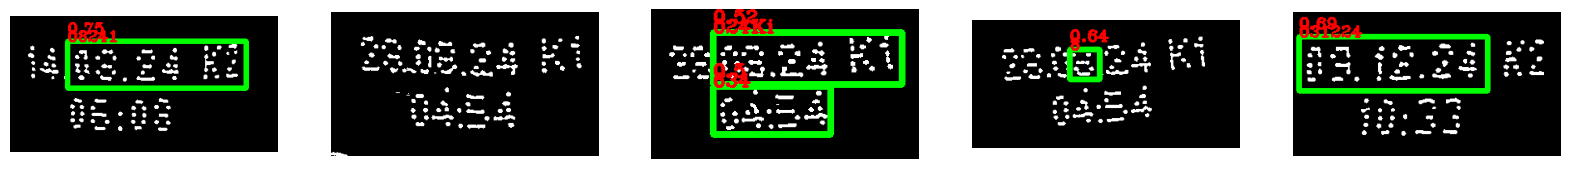

TEXT:  091224K
--------------------------------------------------
PHOTO  47
WITH PREPROCESSING
['091224K']
WITHOUT PREPROCESSING
['05.12.24', '2', '0.33']
TEXT:  09_
TEXT:  2 24
--------------------------------------------------
PHOTO  48
WITH PREPROCESSING
['09_', '2 24']
WITHOUT PREPROCESSING
[]
TEXT:  09122
--------------------------------------------------
PHOTO  49
WITH PREPROCESSING
['09122']
WITHOUT PREPROCESSING
['2', '5']
TEXT:  091244
--------------------------------------------------
PHOTO  50
WITH PREPROCESSING
['091244']
WITHOUT PREPROCESSING
[]
TEXT:  031224K
TEXT:  22.45
--------------------------------------------------
PHOTO  51
WITH PREPROCESSING
['031224K', '22.45']
WITHOUT PREPROCESSING
['12', '6', '22.4']


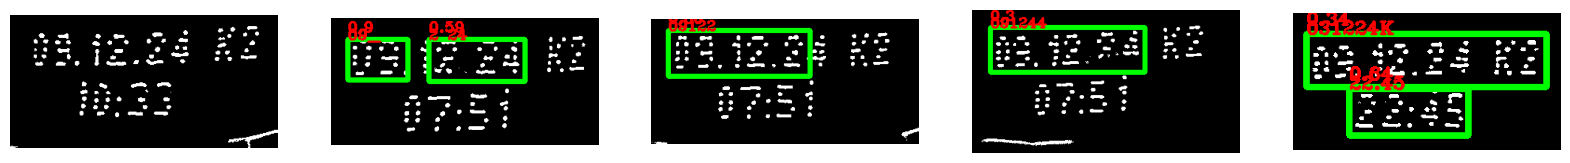

TEXT:  091224K
TEXT:  22.43
--------------------------------------------------
PHOTO  52
WITH PREPROCESSING
['091224K', '22.43']
WITHOUT PREPROCESSING
[]
TEXT:  1.24
TEXT:  #2
--------------------------------------------------
PHOTO  53
WITH PREPROCESSING
['1.24', '#2']
WITHOUT PREPROCESSING
[]
--------------------------------------------------
PHOTO  54
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
['03R24', '22']
TEXT:  72
TEXT:  86
--------------------------------------------------
PHOTO  55
WITH PREPROCESSING
['72', '86']
WITHOUT PREPROCESSING
[]
TEXT:  0709
--------------------------------------------------
PHOTO  56
WITH PREPROCESSING
['0709']
WITHOUT PREPROCESSING
[]


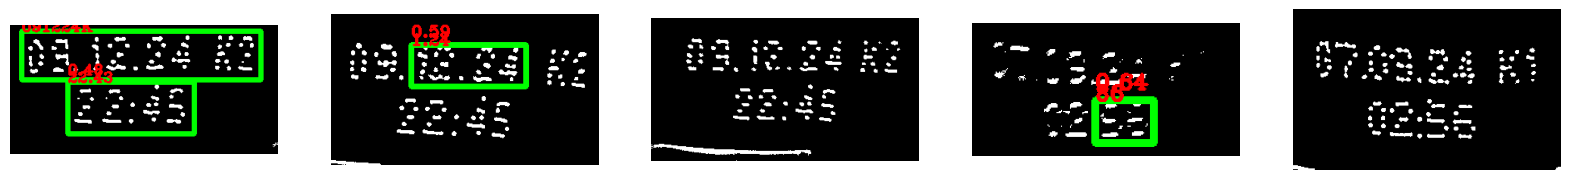

TEXT:  01n924
TEXT:  055
--------------------------------------------------
PHOTO  57
WITH PREPROCESSING
['01n924', '055']
WITHOUT PREPROCESSING
[]
TEXT:  0924K
TEXT:  0
--------------------------------------------------
PHOTO  58
WITH PREPROCESSING
['0924K', '0']
WITHOUT PREPROCESSING
[]
TEXT:  v:
TEXT:  01924
TEXT:  05S
--------------------------------------------------
PHOTO  59
WITH PREPROCESSING
['v:', '01924', '05S']
WITHOUT PREPROCESSING
[]
--------------------------------------------------
PHOTO  60
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
[]
TEXT:  070924
TEXT:  2
--------------------------------------------------
PHOTO  61
WITH PREPROCESSING
['070924', '2']
WITHOUT PREPROCESSING
[]


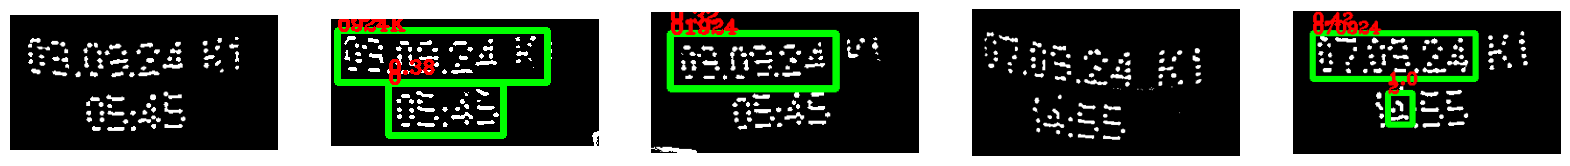

TEXT:  Ki
TEXT:  :
TEXT:  45
TEXT:  03924
--------------------------------------------------
PHOTO  62
WITH PREPROCESSING
['Ki', ':', '45', '03924']
WITHOUT PREPROCESSING
['00924']
--------------------------------------------------
PHOTO  63
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
[]
TEXT:  Viun
--------------------------------------------------
PHOTO  64
WITH PREPROCESSING
['Viun']
WITHOUT PREPROCESSING
[]
TEXT:  09j92
--------------------------------------------------
PHOTO  65
WITH PREPROCESSING
['09j92']
WITHOUT PREPROCESSING
[]
TEXT:  03
TEXT:  Ka
--------------------------------------------------
PHOTO  66
WITH PREPROCESSING
['03', 'Ka']
WITHOUT PREPROCESSING
[]


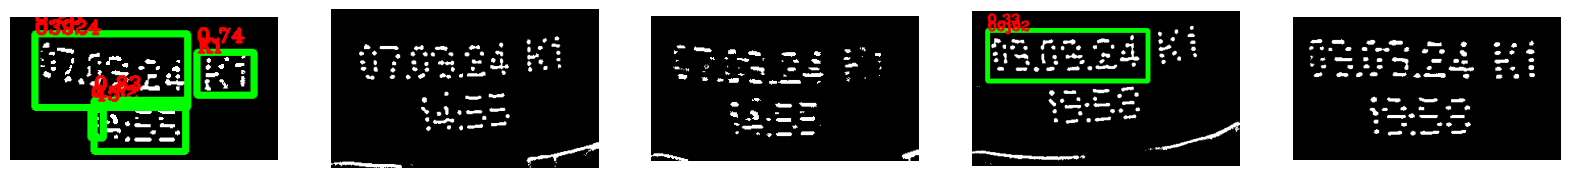

--------------------------------------------------
PHOTO  67
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
[]
TEXT:  3
--------------------------------------------------
PHOTO  68
WITH PREPROCESSING
['3']
WITHOUT PREPROCESSING
['24']
TEXT:  03
TEXT:  924
--------------------------------------------------
PHOTO  69
WITH PREPROCESSING
['03', '924']
WITHOUT PREPROCESSING
['90924']
--------------------------------------------------
PHOTO  70
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
[]
--------------------------------------------------
PHOTO  71
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
[]


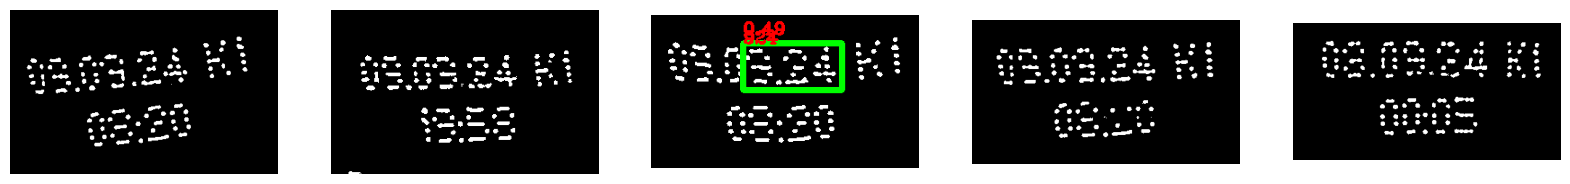

TEXT:  0i944
--------------------------------------------------
PHOTO  72
WITH PREPROCESSING
['0i944']
WITHOUT PREPROCESSING
[]
--------------------------------------------------
PHOTO  73
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
[]
--------------------------------------------------
PHOTO  74
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
[]
TEXT:  010124
TEXT:  K2
--------------------------------------------------
PHOTO  75
WITH PREPROCESSING
['010124', 'K2']
WITHOUT PREPROCESSING
[]
TEXT:  010s24
TEXT:  K
--------------------------------------------------
PHOTO  76
WITH PREPROCESSING
['010s24', 'K']
WITHOUT PREPROCESSING
['324', '1']


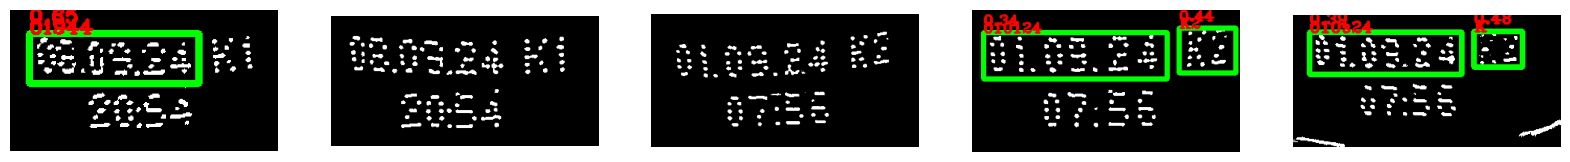

TEXT:  010i24
--------------------------------------------------
PHOTO  77
WITH PREPROCESSING
['010i24']
WITHOUT PREPROCESSING
['62']
TEXT:  010924
TEXT:  0786
--------------------------------------------------
PHOTO  78
WITH PREPROCESSING
['010924', '0786']
WITHOUT PREPROCESSING
['1092', '7.5']
--------------------------------------------------
PHOTO  79
WITH PREPROCESSING
[]
WITHOUT PREPROCESSING
[]
TEXT:  Zb
--------------------------------------------------
PHOTO  80
WITH PREPROCESSING
['Zb']
WITHOUT PREPROCESSING
[]
TEXT:  24.0125 0
--------------------------------------------------
PHOTO  81
WITH PREPROCESSING
['24.0125 0']
WITHOUT PREPROCESSING
['24_']


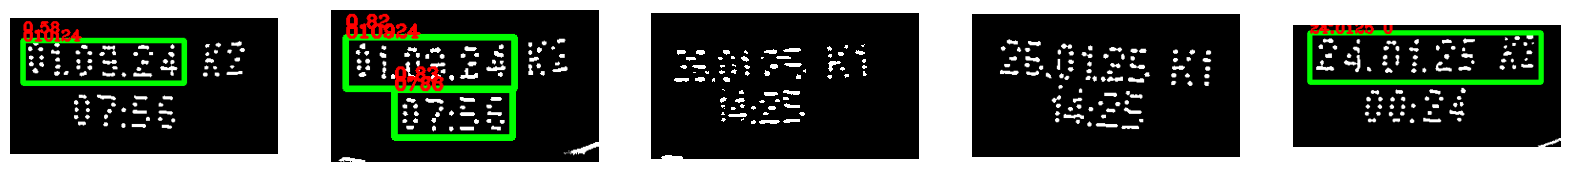

TEXT:  01.09.24
TEXT:  07.6
--------------------------------------------------
PHOTO  82
WITH PREPROCESSING
['01.09.24', '07.6']
WITHOUT PREPROCESSING
[]
TEXT:  240125
--------------------------------------------------
PHOTO  83
WITH PREPROCESSING
['240125']
WITHOUT PREPROCESSING
[]
TEXT:  24.01.25
TEXT:  {2
--------------------------------------------------
PHOTO  84
WITH PREPROCESSING
['24.01.25', '{2']
WITHOUT PREPROCESSING
['4.0125']
TEXT:  40123
--------------------------------------------------
PHOTO  85
WITH PREPROCESSING
['40123']
WITHOUT PREPROCESSING
['0125 K2']
TEXT:  24.0125
TEXT:  Kz
--------------------------------------------------
PHOTO  86
WITH PREPROCESSING
['24.0125', 'Kz']
WITHOUT PREPROCESSING
['0125']


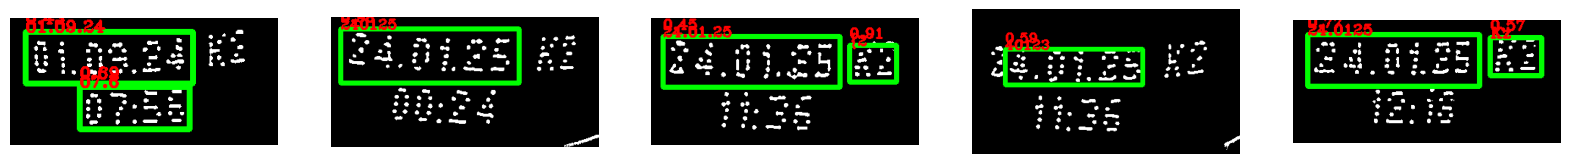

TEXT:  6
TEXT:  125
--------------------------------------------------
PHOTO  87
WITH PREPROCESSING
['6', '125']
WITHOUT PREPROCESSING
['25']


KeyboardInterrupt: 

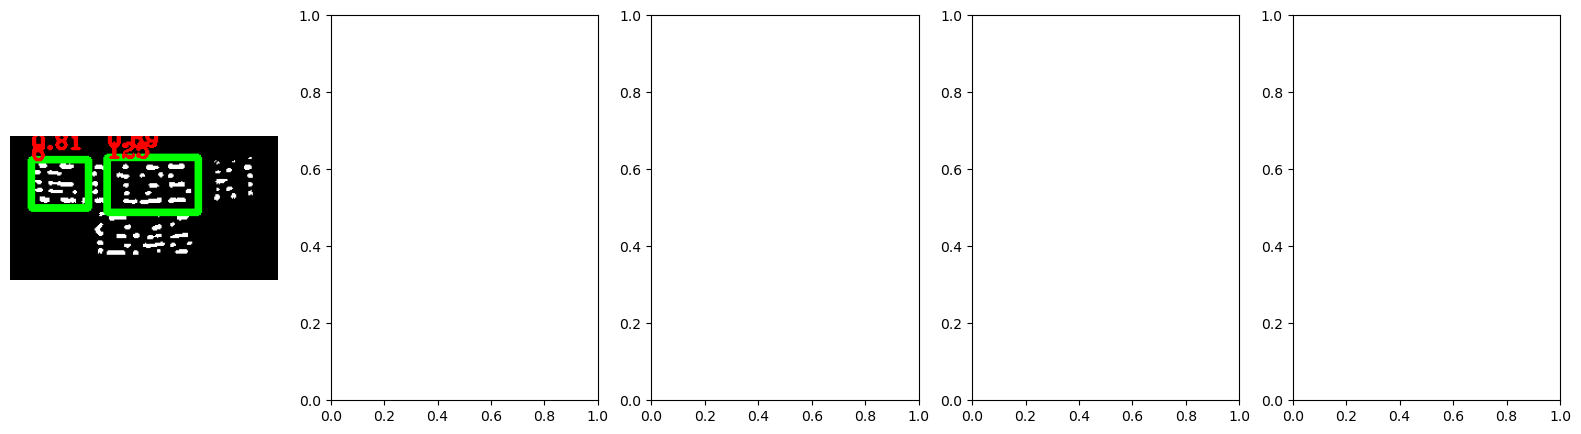

In [22]:
# open all photos from ./data/more_cap_cropped

# Process each photo if it ends with .png
count = 0
show_per_row = 5
photos_path = "./data/more_cap_cropped"
photo_files = [f for f in os.listdir(photos_path) if os.path.isfile(os.path.join(photos_path, f))]
for i,photo_file in enumerate(photo_files):
    if photo_file.endswith(".png"):
        photo_path = os.path.join(photos_path, photo_file)
        res = process_image(photo_path)
        res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
        raw = cv2.imread(photo_path)
        bounds = reader.readtext(res)
        raw_bound = reader.readtext(raw)
        draw_bounding_boxes(res, bounds)
        # print the result with no detail
        print("-"*50)
        print("PHOTO ", i)
        print("WITH PREPROCESSING")
        print([bound[1] for bound in bounds])
        print("================================================")
        print("WITHOUT PREPROCESSING")
        print([bound[1] for bound in raw_bound])
        if count % show_per_row == 0:
            fig, axs = plt.subplots(1, show_per_row, figsize=(20, 5))
        axs[count % show_per_row].imshow(res, cmap='gray')
        axs[count % show_per_row].axis('off')
        count += 1
        if count % show_per_row == 0:
            plt.show()
plt.show()


In [ ]:
# photo_files = [f for f in os.listdir(photos_path) if os.path.isfile(os.path.join(photos_path, f))]
# for photo_file in photo_files:
#     if photo_file.endswith(".png"):
#       path = os.path.join(photos_path, photo_file)
#       res = process_image(path)
#       # save to ./data/more_cap_preprocessed
#       cv2.imwrite(f"./data/more_cap_preprocessed/{photo_file}", res)
#       print(f"Saved {photo_file}")
# print("Done")

Saved 6267247567616197431_lot_no_1.png
Saved 6267247567616197432_lot_no_1.png
Saved 6267247567616197433_lot_no_1.png
Saved 6267247567616197435_lot_no_1.png
Saved 6267247567616197438_lot_no_1.png
Saved 6267247567616197439_lot_no_1.png
Saved 6267247567616197440_lot_no_1.png
Saved 6267247567616197441_lot_no_1.png
Saved 6267247567616197442_lot_no_1.png
Saved 6267247567616197443_lot_no_1.png
Saved 6267247567616197444_lot_no_1.png
Saved 6267247567616197445_lot_no_1.png
Saved 6267247567616197446_lot_no_1.png
Saved 6267247567616197447_lot_no_1.png
Saved 6267247567616197448_lot_no_1.png
Saved 6267247567616197449_lot_no_1.png
Saved 6267247567616197450_lot_no_1.png
Saved 6267247567616197451_lot_no_1.png
Saved 6267247567616197452_lot_no_1.png
Saved 6267247567616197453_lot_no_1.png
Saved 6267247567616197454_lot_no_1.png
Saved 6267247567616197455_lot_no_1.png
Saved 6267247567616197458_lot_no_1.png
Saved 6267247567616197460_lot_no_1.png
Saved 6267247567616197462_lot_no_1.png
Saved 6269272090645480807